### DataFrame are Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).

#### Notebook consists of

** > Creating DataFrame with different inputs of Data**
** > builtin and basic functions**
** > Operations**
** > Indexing, slicing,selection**
** > Renaming column and index**
** > Drop and fill na values**
** > filling while reindexing**
** > sorting and ordering Dataframe**
** > groupby**
** > append,concatenate,merge,join**
** > plots **

In [1]:
import pandas as pd
import numpy as np


In [7]:
#syntax pandas.DataFrame(data=<list/series/dict/another dataframe/numpy array>, index=None, columns=None, dtype=None, copy=False)
#data as list
li = [1,2,3,'word']
df1 = pd.DataFrame(data=li,index=['a','b','c','d'],columns=['col1'])
print(df1)

   col1
a     1
b     2
c     3
d  word


In [10]:
#data as numpy array
n = np.array([1,2,34,5])
df2_nparr = pd.DataFrame(n)
print(df2_nparr)

    0
0   1
1   2
2  34
3   5


In [13]:
#data as Series
ser = pd.Series([1,2,45,4,56])
df_ser = pd.DataFrame(ser)
print(df_ser)

    0
0   1
1   2
2  45
3   4
4  56


In [15]:
#data as Series
dict = {'a': ['abc',2,3],'b':3}
df_dict = pd.DataFrame(dict,index='A B C'.split()) #split() output will be in form of list, so index = ['A','B','C']
print(df_dict)

     a  b
A  abc  3
B    2  3
C    3  3


In [17]:
#list of list as input
data = [[1,"Sarej"],[2,"yuri"],[3,'kiny'],[4,'veer']]
df3 = pd.DataFrame(data=data,columns=['ID','NAME'],index=[1,2,3,4])
print(df3)

   ID   NAME
1   1  Sarej
2   2   yuri
3   3   kiny
4   4   veer


In [22]:
df_op = pd.DataFrame(np.random.randn(5,4),index=['A','B','C','D','E'],columns=['c1','c2','c3','c4'])
print(df_op)

         c1        c2        c3        c4
A -0.726102 -0.127784  1.187332 -0.437624
B  0.288971  0.039519 -1.573464 -0.270928
C  0.332973  0.009091  0.236231  0.664726
D  0.304224  0.600423  1.167501  1.372405
E -0.590617 -0.600337  0.232591 -1.298487


In [237]:
print(df_op.columns) #to find columns of a DataFrame
print(df_op.index) # to find index of DataFrame
print(df_op.keys()) #gives columns as well
print(df_op.dtypes) #to know datatypes of each colums
print('is dataframe empty ?',df_op.empty)
print(df_op.ndim)

Index(['c1', 'c2', 'c3', 'c4'], dtype='object')
Index(['A', 'B', 'C', 'D', 'E'], dtype='object')
Index(['c1', 'c2', 'c3', 'c4'], dtype='object')
c1    float64
c2    float64
c3    float64
c4    float64
dtype: object
is dataframe empty ? False
2


In [92]:
df_op.shape

(5, 4)

In [238]:
print(df_op.values)

[[-0.72610219 -0.12778449  1.1873316  -0.43762366]
 [ 0.28897108  0.03951879 -1.57346401 -0.27092846]
 [ 0.33297291  0.00909127  0.23623136  0.66472567]
 [ 0.30422359  0.6004235   1.16750126  1.37240531]
 [-0.59061738 -0.6003369   0.23259124 -1.29848659]]


In [24]:
df_op['c1'] #to access single column
# df_op.c1

A   -0.726102
B    0.288971
C    0.332973
D    0.304224
E   -0.590617
Name: c1, dtype: float64

In [25]:
#to access multiple columns
df_op[['c2','c4']]

,c2,c4
A,-0.127784,-0.437624
B,0.039519,-0.270928
C,0.009091,0.664726
D,0.600423,1.372405
E,-0.600337,-1.298487


In [39]:
#to create new column with existing columns
df_op['new col'] = df_op['c2'] + df_op['c3']
print(df_op)

         c1        c2        c3        c4   new col
A -0.726102 -0.127784  1.187332 -0.437624  1.059547
B  0.288971  0.039519 -1.573464 -0.270928 -1.533945
C  0.332973  0.009091  0.236231  0.664726  0.245323
D  0.304224  0.600423  1.167501  1.372405  1.767925
E -0.590617 -0.600337  0.232591 -1.298487 -0.367746


In [40]:
#to delete a column
df_op.drop('new col',axis = 1) # after executing it represents as 'new col' is deleted and axis = 1 says as operate it on columns by default axis will be 0

,c1,c2,c3,c4
A,-0.726102,-0.127784,1.187332,-0.437624
B,0.288971,0.039519,-1.573464,-0.270928
C,0.332973,0.009091,0.236231,0.664726
D,0.304224,0.600423,1.167501,1.372405
E,-0.590617,-0.600337,0.232591,-1.298487


In [41]:
print(df_op) #'new col' is still present on original df, so we have to set inplace arg to True to delete it

         c1        c2        c3        c4   new col
A -0.726102 -0.127784  1.187332 -0.437624  1.059547
B  0.288971  0.039519 -1.573464 -0.270928 -1.533945
C  0.332973  0.009091  0.236231  0.664726  0.245323
D  0.304224  0.600423  1.167501  1.372405  1.767925
E -0.590617 -0.600337  0.232591 -1.298487 -0.367746


In [42]:
df_op.drop('new col',axis=1,inplace=True)
print(df_op)

         c1        c2        c3        c4
A -0.726102 -0.127784  1.187332 -0.437624
B  0.288971  0.039519 -1.573464 -0.270928
C  0.332973  0.009091  0.236231  0.664726
D  0.304224  0.600423  1.167501  1.372405
E -0.590617 -0.600337  0.232591 -1.298487


In [56]:
df_op.drop('A',axis=0) #axis = 0(row wise), inplace = true can be gven to delete it from original data

,c1,c2,c3,c4
B,0.288971,0.039519,-1.573464,-0.270928
C,0.332973,0.009091,0.236231,0.664726
D,0.304224,0.600423,1.167501,1.372405
E,-0.590617,-0.600337,0.232591,-1.298487


In [44]:
df_op.unstack() #returns for each index what are the elements present on each column

c1  A   -0.726102
    B    0.288971
    C    0.332973
    D    0.304224
    E   -0.590617
c2  A   -0.127784
    B    0.039519
    C    0.009091
    D    0.600423
    E   -0.600337
c3  A    1.187332
    B   -1.573464
    C    0.236231
    D    1.167501
    E    0.232591
c4  A   -0.437624
    B   -0.270928
    C    0.664726
    D    1.372405
    E   -1.298487
dtype: float64

In [45]:
print(type(df_op))
print(type(df_op['c1']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [48]:
#dir(df_op) # different operations performed on a dataframe
len(dir(df_op))

449

In [58]:
df_op.describe(include='all') #includes both string and non string and arg should not be passed as list

,c1,c2,c3,c4
count,5.000000,5.000000,5.000000,5.000000
mean,-0.078110,-0.015818,0.250038,0.006018
std,0.532089,0.429428,1.123155,1.033944
min,-0.726102,-0.600337,-1.573464,-1.298487
25%,-0.590617,-0.127784,0.232591,-0.437624
50%,0.288971,0.009091,0.236231,-0.270928
75%,0.304224,0.039519,1.167501,0.664726
max,0.332973,0.600423,1.187332,1.372405


#### Indexing ,selecting, slicing dataframe

#### loc() and iloc()

In [62]:
#label based indexing
#loc takes two single/list/range operator separated by ','. The first one indicates the row and the second one indicates columns

# syntax:DataFrame.loc[<rows>,<columns>]

df_op.loc['A','c3'] # returns element present in Ath row and c3 column

1.187331601944305

In [63]:
df_op.loc[['A','C'],['c4']]

,c4
A,-0.437624
C,0.664726


In [77]:
df_op.loc[:,['c1','c3']]

,c1,c3
A,-0.726102,1.187332
B,0.288971,-1.573464
C,0.332973,0.236231
D,0.304224,1.167501
E,-0.590617,0.232591


In [78]:
df_op.loc['A':'E']  #select range of rows for all columns

,c1,c2,c3,c4
A,-0.726102,-0.127784,1.187332,-0.437624
B,0.288971,0.039519,-1.573464,-0.270928
C,0.332973,0.009091,0.236231,0.664726
D,0.304224,0.600423,1.167501,1.372405
E,-0.590617,-0.600337,0.232591,-1.298487


In [79]:
df_op.loc['A':'E','c1':'c3'] #selects rows from A to E and columns from C1 to C4 and returns elements

,c1,c2,c3
A,-0.726102,-0.127784,1.187332
B,0.288971,0.039519,-1.573464
C,0.332973,0.009091,0.236231
D,0.304224,0.600423,1.167501
E,-0.590617,-0.600337,0.232591


In [82]:
#boolean
print(df_op.loc['A'] > 1)

c1    False
c2    False
c3     True
c4    False
Name: A, dtype: bool


### iloc()

#### integer based indexing
it can have
integers,list of integers,range of values

In [85]:
print(df_op)

         c1        c2        c3        c4
A -0.726102 -0.127784  1.187332 -0.437624
B  0.288971  0.039519 -1.573464 -0.270928
C  0.332973  0.009091  0.236231  0.664726
D  0.304224  0.600423  1.167501  1.372405
E -0.590617 -0.600337  0.232591 -1.298487


In [86]:
df_op.iloc[0,:] #1st row , all columns

c1   -0.726102
c2   -0.127784
c3    1.187332
c4   -0.437624
Name: A, dtype: float64

In [87]:
df_op.iloc[:4]# it returns rows 0,1,2,3 and all columns, range(start:stop:step),stop--> len-1

,c1,c2,c3,c4
A,-0.726102,-0.127784,1.187332,-0.437624
B,0.288971,0.039519,-1.573464,-0.270928
C,0.332973,0.009091,0.236231,0.664726
D,0.304224,0.600423,1.167501,1.372405


In [89]:
df_op.iloc[1:4,0:4] #1,2,3 row and 0,1,2,3 columns elements will be returned

,c1,c2,c3,c4
B,0.288971,0.039519,-1.573464,-0.270928
C,0.332973,0.009091,0.236231,0.664726
D,0.304224,0.600423,1.167501,1.372405


In [90]:
df_op.iloc[:,2:4]#all the rows and 2nd,3rd column elements

,c3,c4
A,1.187332,-0.437624
B,-1.573464,-0.270928
C,0.236231,0.664726
D,1.167501,1.372405
E,0.232591,-1.298487


In [97]:
# Slicing through list of values
print(df_op.iloc[[1, 3, 4], [1, 3]],'\n'*2) #selects elements from 1,3,5 rows and 1,3 cols

print(df_op.iloc[1:3, :],'\n'*2) #elements from 1,2 rows and all cols
print(df_op.iloc[:,1:3])#elements from all rows and 1,2 col

         c2        c4
B  0.039519 -0.270928
D  0.600423  1.372405
E -0.600337 -1.298487 


         c1        c2        c3        c4
B  0.288971  0.039519 -1.573464 -0.270928
C  0.332973  0.009091  0.236231  0.664726 


         c2        c3
A -0.127784  1.187332
B  0.039519 -1.573464
C  0.009091  0.236231
D  0.600423  1.167501
E -0.600337  0.232591


In [102]:
df_op[df_op['c1'] > 0] 

,c1,c2,c3,c4
B,0.288971,0.039519,-1.573464,-0.270928
C,0.332973,0.009091,0.236231,0.664726
D,0.304224,0.600423,1.167501,1.372405


In [244]:
print('mean of given column is: ',df_op['c1'].mean())
print('sum of given column is: ',df_op['c1'].sum())
print('std dvt of given column is: ',df_op['c1'].std())
print('median of given column is: ',df_op['c1'].median())

print('\n'*2)
print(df_op.sum())
print()
print(df_op.std())

mean of given column is:  -0.07811039683703058
sum of given column is:  -0.3905519841851529
std dvt of given column is:  0.5320888891228825
median of given column is:  0.288971082884444



c1   -0.390552
c2   -0.079088
c3    1.250191
c4    0.030092
dtype: float64

c1    0.532089
c2    0.429428
c3    1.123155
c4    1.033944
dtype: float64


#### Renaming column and index

In [113]:
df_op.rename(columns={'c1': 'COL1'},index={'B':'b2'}) #in original dataframe to get it changed should use inplace=True
#df_op.rename(columns={'c1': 'COL1'},index={'B':'b2'},inplace=True) 

,COL1,c2,c3,c4
A,-0.726102,-0.127784,1.187332,-0.437624
b2,0.288971,0.039519,-1.573464,-0.270928
C,0.332973,0.009091,0.236231,0.664726
D,0.304224,0.600423,1.167501,1.372405
E,-0.590617,-0.600337,0.232591,-1.298487


In [112]:
df_op

,c1,c2,c3,c4
A,-0.726102,-0.127784,1.187332,-0.437624
B,0.288971,0.039519,-1.573464,-0.270928
C,0.332973,0.009091,0.236231,0.664726
D,0.304224,0.600423,1.167501,1.372405
E,-0.590617,-0.600337,0.232591,-1.298487


## Filling and dropping na value fields

In [131]:
df_ex = pd.DataFrame({'A':[23,45,np.nan],'B':[np.nan,np.nan,78],'C':['word',np.nan,85]},index=['r1','r2','r3'])

In [132]:
df_ex

,A,B,C
r1,23.0,NaN,word
r2,45.0,NaN,NaN
r3,NaN,78.0,85


In [133]:
df_ex.isnull().sum() # col A has 1 nan, B--> 2 nan,c--> 1 nan

A    1
B    2
C    1
dtype: int64

### Filling : fillna()

In [135]:
# to fill nan values
#df_ex.fillna(value=90) #value = int/float/string/result of different operations is filled in every nan fields
df_ex.fillna(value=df_ex['A'].mean()) #inplace= True, changes original dataframe

,A,B,C
r1,23.0,34.0,word
r2,45.0,34.0,34
r3,34.0,78.0,85


### drop: dropna() to drop na value fields row/columns as per axis

In [138]:
df4 = pd.DataFrame({'A':[23,45,np.nan],'B':[np.nan,np.nan,78],'C':['word',78,85]},index=['r1','r2','r3'])
print(df4)

       A     B     C
r1  23.0   NaN  word
r2  45.0   NaN    78
r3   NaN  78.0    85


In [139]:
df4.dropna(axis=1) #if found any na in column, that column will be dropped, use inplace=True to modify original dataframe
#df4.dropna(axis=0) #rowwise

,C
r1,word
r2,78
r3,85


In [142]:
df5 = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [144]:
df5.dropna(thresh=2) #axis=0(row), atleast  2 values should be present . In this example 3rd row has only 1 value and 2 nan, so it is excluded

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [145]:
df5.dropna(thresh=3)# row 1 has 3  values where other rows doesnt have all 3 values, it has na. Thresh refers to given value or more

,A,B,C
0,1.0,5.0,1


In [147]:
dfr = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
dfr.head() # gives first 5 rows by default
#dfr.head(n=) #used to give 'n' no of rows
#similarly DataFrame.tail()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [148]:
print('rows by col: ',dfr.shape)
print('dimension is: ',dfr.ndim)
print('total no of elements(size): ',dfr.size)

rows by col:  (4, 3)
dimension is:  2
total no of elements(size):  12


In [150]:
dfr['col2'].unique() # unique elements present in col2

array([444, 555, 666], dtype=int64)

In [151]:
dfr['col2'].nunique() #no of unique elements in selected column

3

In [152]:
dfr['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

In [159]:
#Select from DataFrame using criteria from multiple columns
print(dfr,'\n')
newdf = dfr[(dfr['col1']>2) & (dfr['col2']==444)]
print("newdf")
print(newdf)

   col1  col2 col3
0     1   444  abc
1     2   555  def
2     3   666  ghi
3     4   444  xyz 

newdf
   col1  col2 col3
3     4   444  xyz


### filling while reindexing

In [248]:
df_re1 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
df_re2 = pd.DataFrame(np.random.randn(2,3),columns=['col1','col2','col3'])

# Padding NAN's
print(df_re2.reindex_like(df_re1))
print()
# Now Fill the NAN's with preceding Values
print("Data Frame with Forward Fill:")
print(df_re2.reindex_like(df_re1,method='ffill'),'\n'*2)
print(df_re2.reindex_like(df_re1,method='ffill',limit=2))



       col1      col2      col3
0  0.632725 -0.142781  0.542860
1 -1.206484 -1.226700 -0.036705
2       NaN       NaN       NaN
3       NaN       NaN       NaN
4       NaN       NaN       NaN
5       NaN       NaN       NaN

Data Frame with Forward Fill:
       col1      col2      col3
0  0.632725 -0.142781  0.542860
1 -1.206484 -1.226700 -0.036705
2 -1.206484 -1.226700 -0.036705
3 -1.206484 -1.226700 -0.036705
4 -1.206484 -1.226700 -0.036705
5 -1.206484 -1.226700 -0.036705 


       col1      col2      col3
0  0.632725 -0.142781  0.542860
1 -1.206484 -1.226700 -0.036705
2 -1.206484 -1.226700 -0.036705
3 -1.206484 -1.226700 -0.036705
4       NaN       NaN       NaN
5       NaN       NaN       NaN


#### permanenetly removing a column 

In [ ]:
del dfr['col1']

In [164]:
print(dfr)

   col2 col3
0   444  abc
1   555  def
2   666  ghi
3   444  xyz


#### ** Sorting and ordering DataFrame**

In [171]:
#syntax: dfr.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
print("ascending order of index")
print(dfr.sort_index(),'\n'*3)

print("descending order of index")
print(dfr.sort_index(ascending=False),'\n'*2)

print("ascending order of values")
print(dfr.sort_values(by=['col2']),'\n'*2)

print("descending order of values")
print(dfr.sort_values(by=['col2'],ascending=False))


ascending order of index
   col2 col3
0   444  abc
1   555  def
2   666  ghi
3   444  xyz 



descending order of index
   col2 col3
3   444  xyz
2   666  ghi
1   555  def
0   444  abc 


ascending order of values
   col2 col3
0   444  abc
3   444  xyz
1   555  def
2   666  ghi 


descending order of values
   col2 col3
2   666  ghi
1   555  def
0   444  abc
3   444  xyz


In [172]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df_pt = pd.DataFrame(data)
print(df_pt)

     A    B  C  D
0  foo  one  x  1
1  foo  one  y  3
2  foo  two  x  2
3  bar  two  y  5
4  bar  one  x  4
5  bar  one  y  1


In [173]:
df_pt.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

In [175]:
data = {'Company':['Goog','Msft','Goog','Msft','FB','FB'],
        'Person':['Adse','gun','poiu','kin','yun','ma'],
       'Sales':[200,300,400,500,123,456]}

dfg = pd.DataFrame(data)
print(dfg)

  Company Person  Sales
0    Goog   Adse    200
1    Msft    gun    300
2    Goog   poiu    400
3    Msft    kin    500
4      FB    yun    123
5      FB     ma    456


In [177]:
by_comp = dfg.groupby('Company')

In [181]:
#dfg.groupby('Company').mean()
by_comp.mean()

,Sales
Company,
FB,289.5
Goog,300.0
Msft,400.0


In [182]:
by_comp.min()

,Person,Sales
Company,,
FB,ma,123
Goog,Adse,200
Msft,gun,300


In [183]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  289.5  235.466558  123.0  206.25  289.5  372.75  456.0
Goog      2.0  300.0  141.421356  200.0  250.00  300.0  350.00  400.0
Msft      2.0  400.0  141.421356  300.0  350.00  400.0  450.00  500.0

In [185]:
by_comp.describe().transpose()

Company              FB        Goog        Msft
Sales count    2.000000    2.000000    2.000000
      mean   289.500000  300.000000  400.000000
      std    235.466558  141.421356  141.421356
      min    123.000000  200.000000  300.000000
      25%    206.250000  250.000000  350.000000
      50%    289.500000  300.000000  400.000000
      75%    372.750000  350.000000  450.000000
      max    456.000000  400.000000  500.000000

In [186]:
by_comp.describe().transpose()['Goog']

Sales  count      2.000000
       mean     300.000000
       std      141.421356
       min      200.000000
       25%      250.000000
       50%      300.000000
       75%      350.000000
       max      400.000000
Name: Goog, dtype: float64

## Merging, Joining, Concatenating, Appending

In [187]:
dataf1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

dataf2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

dataf3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [188]:
print(dataf1)
print()
print(dataf2)
print()
print(dataf3)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


### append

In [192]:
dataf1.append(dataf2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [193]:
dataf3.append(dataf1)

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


### Concatenate

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use pd.concat and pass in a list of DataFrames to concatenate together

In [194]:
pd.concat([dataf1,dataf3]) #axis=0 by default

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [195]:
pd.concat([dataf1,dataf3],axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,A9,B9,C9,D9
10,NaN,NaN,NaN,NaN,A10,B10,C10,D10
11,NaN,NaN,NaN,NaN,A11,B11,C11,D11


In [196]:
pd.concat([dataf1,dataf2,dataf3],axis=0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [197]:
pd.concat([dataf1,dataf2,dataf3],axis=1) #column wise

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


### Merging
The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together.
Types:
1) inner
2) outer
3) left outer
4) right outer

In [198]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [199]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [200]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [202]:
pd.merge(left,right,how='inner',on='key') #by default it will be inner.(how='inner)

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [205]:
pd.merge(right,left,on='key')

,C,D,key,A,B
0,C0,D0,K0,A0,B0
1,C1,D1,K1,A1,B1
2,C2,D2,K2,A2,B2
3,C3,D3,K3,A3,B3


##### some more examples with different dataframes

In [206]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [207]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [208]:
right

,C,D,key1,key2
0,C0,D0,K0,K0
1,C1,D1,K1,K0
2,C2,D2,K1,K0
3,C3,D3,K2,K0


In [209]:
pd.merge(left, right, on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


In [210]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K2,K0,C3,D3


In [211]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2
3,NaN,NaN,K2,K0,C3,D3


In [212]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN


### Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [213]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [214]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [215]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [216]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [217]:
right.join(left,how='inner') #joining only matched index of left and right

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2


In [218]:
left.join(right, how='right') #right df index only ,all cols, nan for non matching values

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [219]:
left.join(right, how='outer') #matching + all combinations

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [220]:
right.join(left)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


### Pandas visualization

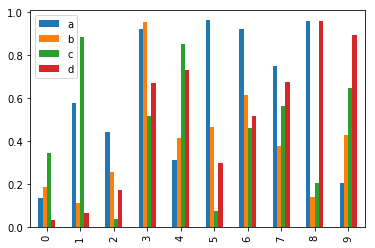

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot.bar()



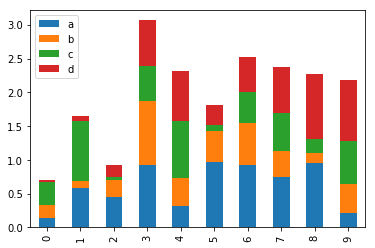

In [227]:
df.plot.bar(stacked=True)


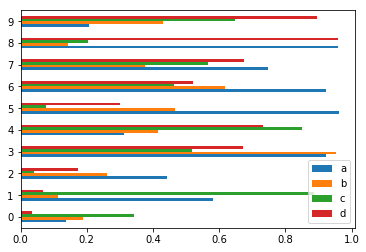

In [228]:
df.plot.barh()


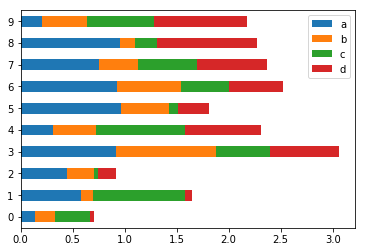

In [229]:
df.plot.barh(stacked=True)


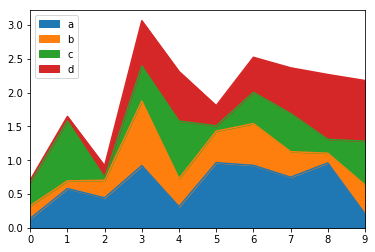

In [231]:
df.plot.area()

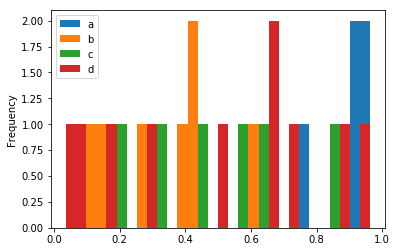

In [233]:
df.plot.hist(bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002119CD14470>], dtype=object)

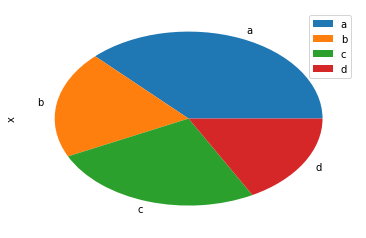

In [235]:
df = pd.DataFrame(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], columns=['x'])
df.plot.pie(subplots=True)